<a href="https://colab.research.google.com/github/willsacraa/Projeto_ENGG21/blob/main/Analise_dados_BrunaWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=blue>Análise exploratória de dados

**Dupla: Bruna Climaco e William Sacramento.** <p>

Utilizando o banco de dados do kaggle, sobre a qualidade de vinho. <p>
Objetivo: criar um modelo para predizer a qualidade de um vinho, considerando sua composição. Com foco em produtores de vinhos, utilizarem esse modelo para assim analisar a produção com intuito de melhorar a qualidade dos vinhos. <p>
Link: https://www.kaggle.com/rajyellow46/wine-quality <p>


In [1]:
#Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import cm
from wordcloud import WordCloud
import plotly.graph_objects as go
! pip install upsetplot
from upsetplot import UpSet
from scipy.stats import anderson
from scipy.stats import pearsonr
from scipy import stats
import math

  Created wheel for upsetplot: filename=UpSetPlot-0.6.0-py3-none-any.whl size=18093 sha256=fa333613f37e35bcd5b9f2043c08db2cf964908d9254095f1e0b1b835008db85
  Stored in directory: /root/.cache/pip/wheels/e8/f9/4a/b71b6b3194361ca612f42135e8e35698ce60144b167dbb19e3
Successfully built upsetplot


Coletando o banco de dados diretamente do GitHub

In [2]:
#Utilizando o github para acessar o banco de dados

!git clone https://github.com/willsacraa/Projeto_ENGG21.git

Cloning into 'Projeto_ENGG21'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


Definindo o banco de dados como um DataFrame

In [3]:
#Definindo o banco de dados

df = pd.read_csv('Projeto_ENGG21/winequalityN.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Visualizando o banco de dados, vemos que a maioria das variáveis são do tipo numérica, com excessão da variável 'Type'.

In [4]:
#Visualizando cada variável
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Aqui vemos quantos valores unicos cada variável possui. Com essa análise, percebemos que duas variáveis aparentam ser categóricas por possuirem poucos valores unicos (Type e Quality)

In [5]:
#Analisando a quantidade de valores unicos de cada variavel
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

Tabela estatística dos dados<p>
Nela conseguimos ver que há alguns dados faltantes, pois o nosso DataFrame possui 6497 linhas, porém algumas variáveis possuem menos variavéis do que isso, indicando dados faltantes.

In [6]:
#Analise estatistica
#Tabela descritiva das variáveis
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Dados faltantes



Como vimos anteriormente, havia dados faltantes e já conseguiamos ve-lôs desde a tabela descritiva, porém usando os próximos comandos conseguimos ter certeza disso, bem como analisar a quantidade deles.

In [7]:
#Ver se há dados faltantes 
df.isnull().values.any()

True

In [8]:
#Contagem de dados faltantes por variável
print(df.isna().sum())
print(f'\nTotal de valores missing: {df.isna().sum().sum()}')

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Total de valores missing: 38


# Gráficos Descritivos

Seguindo, faremos gráficos descritivos para analisarmos melhor as variáveis. Mas primeiramente, devemos realizar uma padronização dos dados, pois cada variável possui uma escala e isso atrapalharia a visualização.

In [9]:
#Criando um novo data frame sem a variavel target
df2 = df.drop('quality', axis=1)

#NPadronizar entradas
from sklearn.preprocessing import StandardScaler
var_entrada=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
standardization = StandardScaler()
X_array = standardization.fit_transform(df2[var_entrada])
df2[var_entrada] = pd.DataFrame(X_array,columns = df2[var_entrada].columns).set_index(df2.index)
df2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,-0.167030,-0.423303,0.284180,3.206483,-0.315173,0.815565,0.959976,2.102214,-1.358722,-0.545791,-1.418558
1,white,-0.706883,-0.241083,0.146489,-0.808012,-0.200996,-0.931107,0.287618,-0.232332,0.507693,-0.276979,-0.831615
2,white,0.681310,-0.362563,0.559560,0.305958,-0.172452,-0.029599,-0.331660,0.134525,0.258838,-0.612994,-0.328521
3,white,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219
4,white,-0.012786,-0.666262,0.008799,0.642251,0.055902,0.928254,1.243074,0.301278,-0.176659,-0.881807,-0.496219
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,-0.784004,1.581115,-1.643483,-0.723939,0.969318,0.083090,-1.269422,0.067824,1.440901,0.327849,0.006875
6493,red,-1.015370,1.277415,-1.505793,-0.681902,0.170079,0.477500,-1.145567,0.141195,1.876398,NaN,0.593818
6494,red,-0.706883,1.034456,-1.299258,-0.660884,0.569698,-0.085943,-1.340197,0.347969,1.254259,1.470302,0.426120
6495,red,-1.015370,1.854445,-1.368103,-0.723939,0.541154,0.083090,-1.269422,0.257923,2.187467,1.201490,-0.244672


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a73014710>,
      dtype=object)

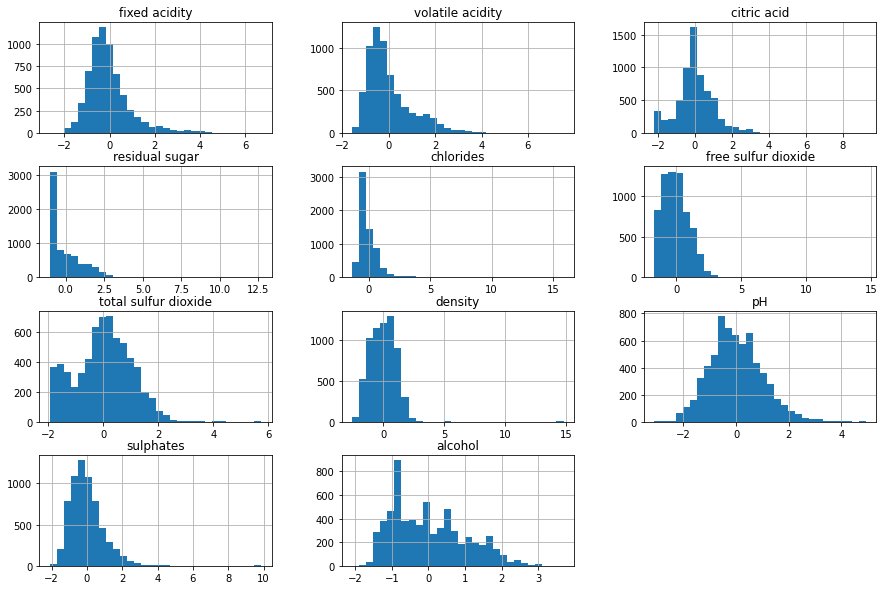

In [10]:
#Histogramas
df2.hist(bins=30, figsize=(15, 10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



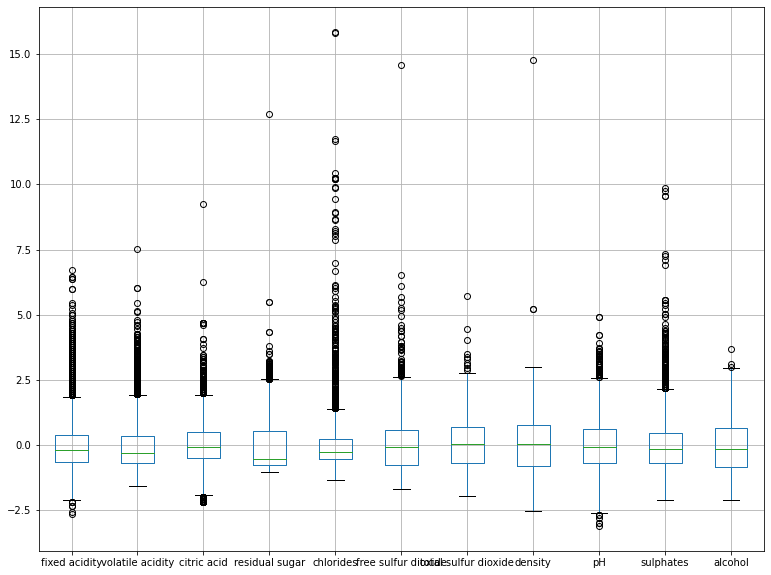

In [11]:
#Boxplots
df2.boxplot(figsize=(13, 10))

Com os dois próximos gráficos, vemos que há mais vinhos brancos do que tinto neste DataFrame

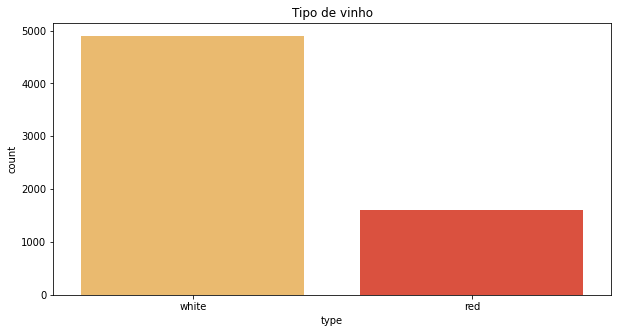

In [12]:
#Gráfico do tipo de vinho
plt.figure(figsize = (10,5))
plt.title("Tipo de vinho")
sns.countplot(x=df['type'], palette = "YlOrRd")

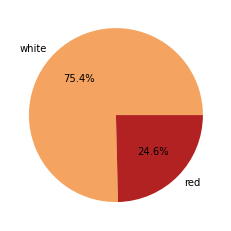

In [13]:
#Gráfico de pizza do tipo de vinho
valores = df['type'].value_counts()
plt.pie(valores,labels=['white','red'],autopct='%1.1f%%',colors=['sandybrown','firebrick'])
plt.show()

No próximo gráfico vemos que os vinhos branco são os que tem o menor pH, maior acidez. Inclusive, podemos perceber isso na realidade, pois os vinhos branco são produzidos pela uva ainda verde, enquanto os tinto com a uva já madura.

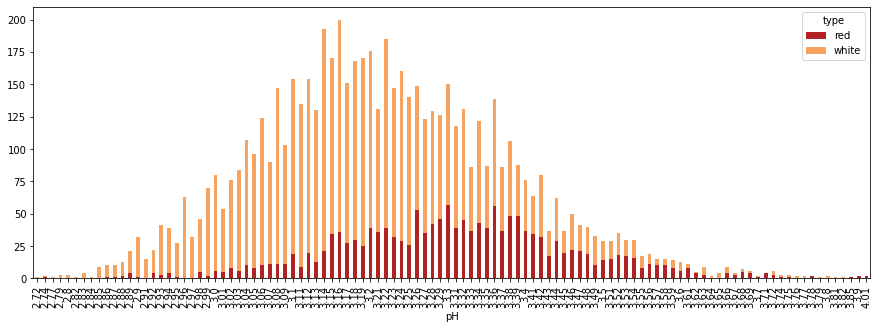

In [14]:
#Grafico de barras -> pH em relação ao type
pd.crosstab(df['pH'], df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

Analisando o tipo de vinho com a quantidade de ácido cítrico, vemos que os vinhos branco estão concentrados, enquanto os vinhos tinto estão distribuidos.

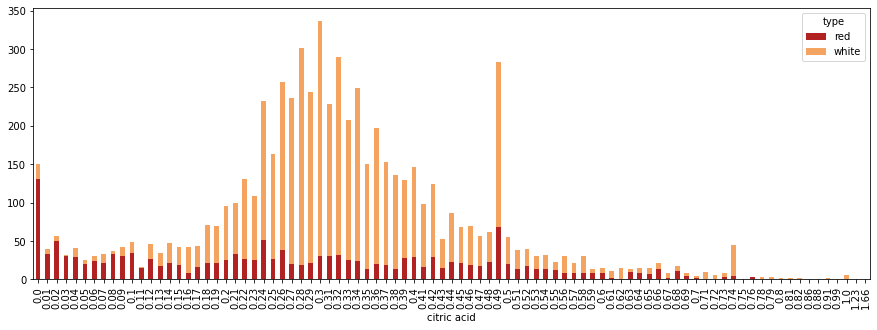

In [15]:
#Grafico de barras -> ácido citrico em relação ao type
pd.crosstab(df['citric acid'], df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

# Analisando a variável quality separadamente

In [16]:
#Criando um objeto com a variável quality
target = df['quality']
target

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [17]:
#Tabela descritiva
target.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [18]:
#Analisando os valores únicos
target.unique()

array([6, 5, 7, 8, 4, 3, 9])

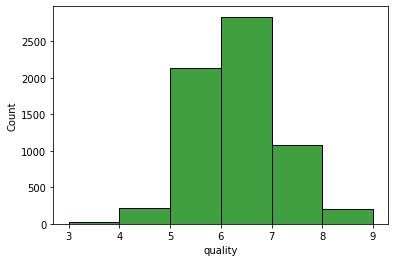

In [19]:
#Histograma
sns.histplot(target, binwidth=1,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



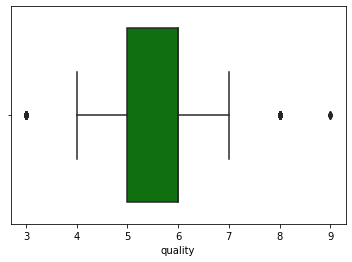

In [20]:
#Boxplot
sns.boxplot(target,color='green')

Já analisando o tipo de vinho com a variável 'Quality', vemos que ambos os tipos estão bem distribuidos.

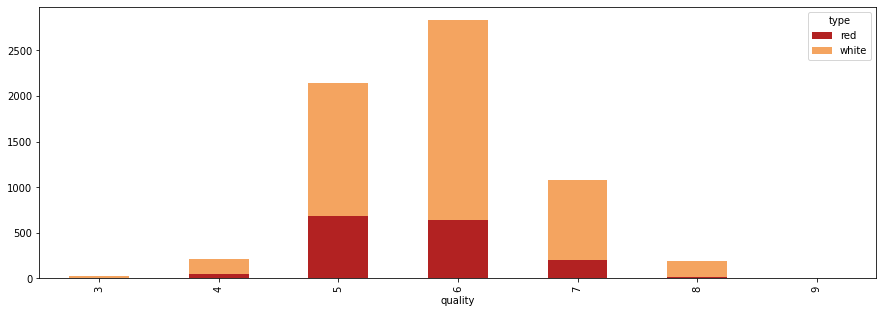

In [21]:
#Grafico de barras -> quality em relação ao type
pd.crosstab(target, df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

Agora analisaremos quantos vinhos considerados bons de acordo com a escala Robert Parker (são considerados bons com nota igual ou maior à  70, de acordo com nosso DataFrame, nota igual ou maior à 7), são branco e tinto no nosso DataFrame. <p>
Link sobre a escala de Robert Parker: https://www.divinho.com.br/criticos/robert-parker/

Porcentagem dos valores: 21.64 % de vinhos branco e 13.57 % de vinhos tinto.


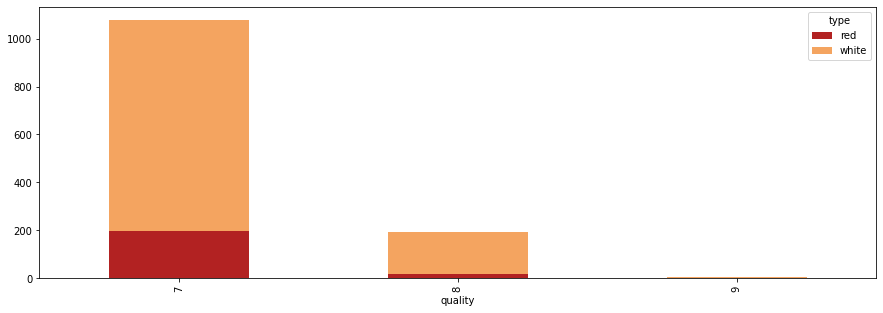

In [22]:
#Analisando qual a porcentagem de vinhos tinto e branco com qualidade maior ou igual a 6

target2 = df.loc[df['quality'] >= 7]
contagem = df.groupby('type').count()
contagem1 = target2.groupby([target2.type == 'red']).count()
contagem = contagem['quality']
contagem1 = contagem1['quality']
print('Porcentagem dos valores:',round(1060/4898*100,2),'% de vinhos branco e',round(217/1599*100,2),'% de vinhos tinto.')

pd.crosstab(target2['quality'], df['type']).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['firebrick','sandybrown'])

# Analise de correlação

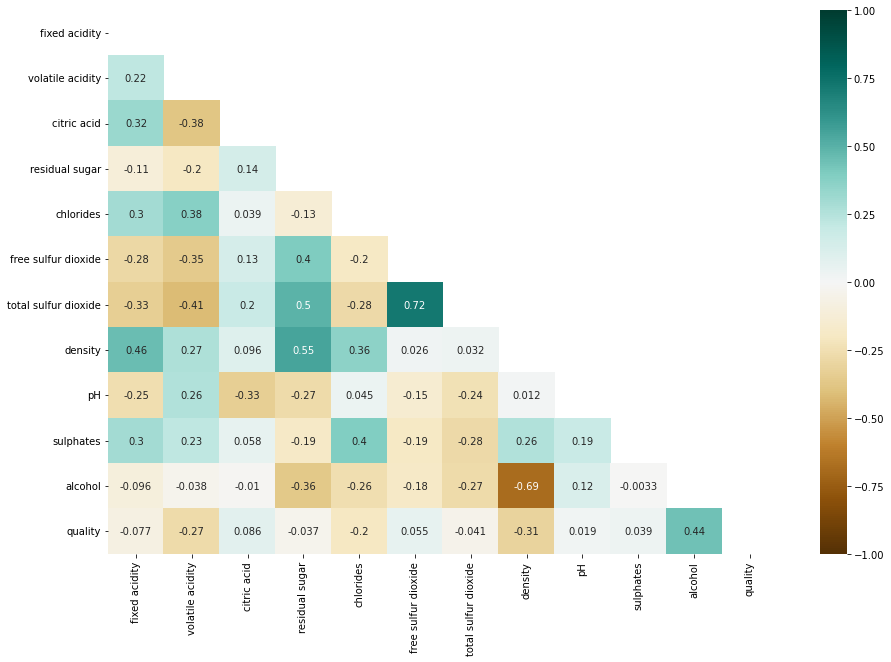

In [23]:
#Criando o gráfico de correlação das variáveis
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=mask, cmap='BrBG',)

Vemos uma alta correlação nas variáveis 'Free Sulfur Dioxide' e 'Total Sulfur Dioxide', e também nas variáveis 'Density' e 'Residual Sugar'.

In [24]:
#Valores de correlação
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


Podemos ver no gráfico abaixo se as correlações são de causa e efeito. <p>
Como nas variáveis  'Free Sulfur Dioxide' e 'Total Sulfur Dioxide', vemos uma pequena correlação desse tipo, pois o gráfico se assemelha a uma reta, quando uma cresce a outra tende a crescer.

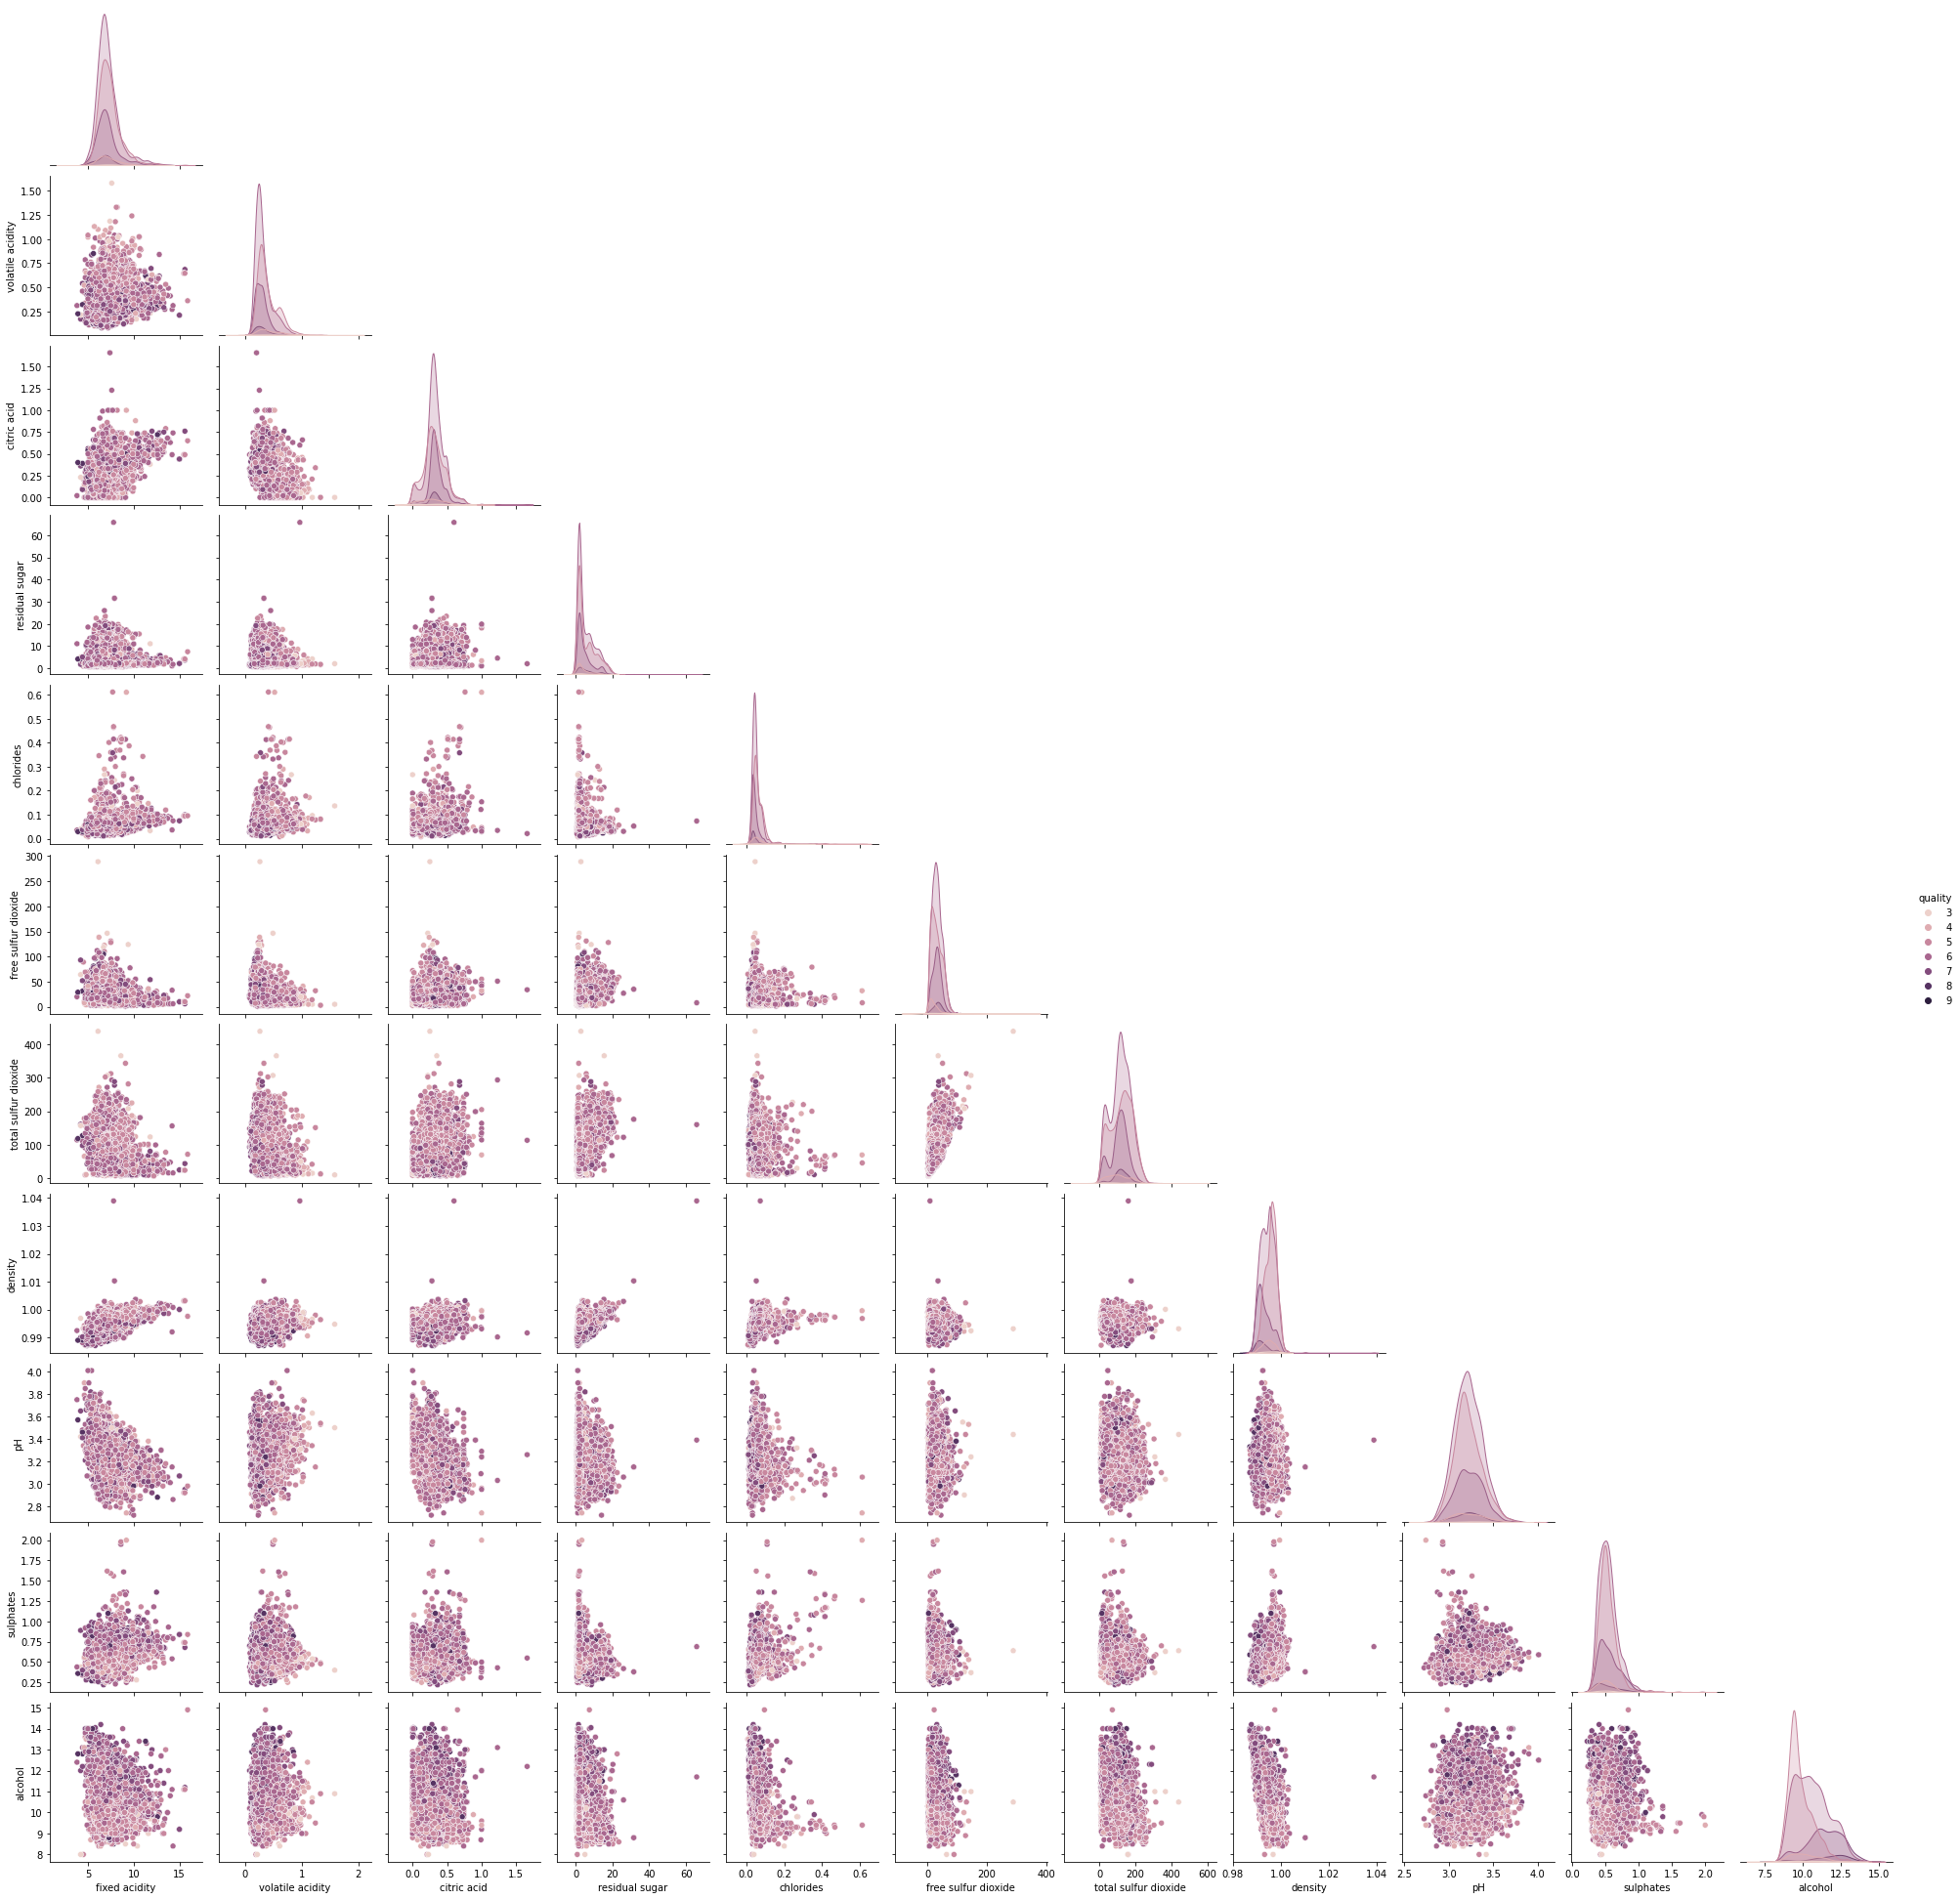

In [25]:
sns.pairplot(df, hue='quality', corner=True)